In [1]:
%pylab notebook
%matplotlib notebook
import os, glob
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import rawpy

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Combine flats from list, using a provided numpy averaging function.
def combine_arrays(file_list, combination_function=np.average):
    stack = None
    for fname, i in zip(file_list, range(len(file_list))):

        raw = rawpy.imread(fname)
        array = raw.raw_image

        if stack is None:            
            stack = np.zeros(shape=(array.shape[0],array.shape[1],len(file_list)), dtype=float)

        stack[:,:,i] = array

    return combination_function(stack, axis=2)

In [3]:
# Plots files from list
def plot_multiple(input_list, title):
    figsize(10,3)
    names = [title+' '+str(i) for i in range(len(input_list))]

    fig = plt.figure() 
    ax = None
    for array, name, i in zip(input_list, names, range(len(input_list))):
        if ax is None:
            ax = fig.add_subplot(1, 3, i+1)
            ax.set_title(names[i])    
        else:
            ax1 = fig.add_subplot(1, 3, i+1, sharex=ax, sharey=ax)
            ax1.set_title(names[i])    
        plt.imshow(array)
        plt.colorbar()
    plt.show()

In [4]:
def process(list_raw, slice1, slice2, slice3, name, combination_function=np.average):
    combined_flat_1 = combine_arrays(list_raw[slice1], combination_function)
    combined_flat_2 = combine_arrays(list_raw[slice2], combination_function)
    combined_flat_3 = combine_arrays(list_raw[slice3], combination_function)
    
    diff_1 = combined_flat_1 - combined_flat_3
    diff_2 = combined_flat_2 - combined_flat_3
    diff_3 = combined_flat_1 - combined_flat_2

    plot_multiple([combined_flat_1, combined_flat_2, combined_flat_3], 'Combined ' + name)
    plot_multiple([diff_1, diff_2, diff_3], 'Diff')

In [5]:
path = '../astrophotography_data/MilkyWayPrettyBoy/flats/'

<IPython.core.display.Javascript object>


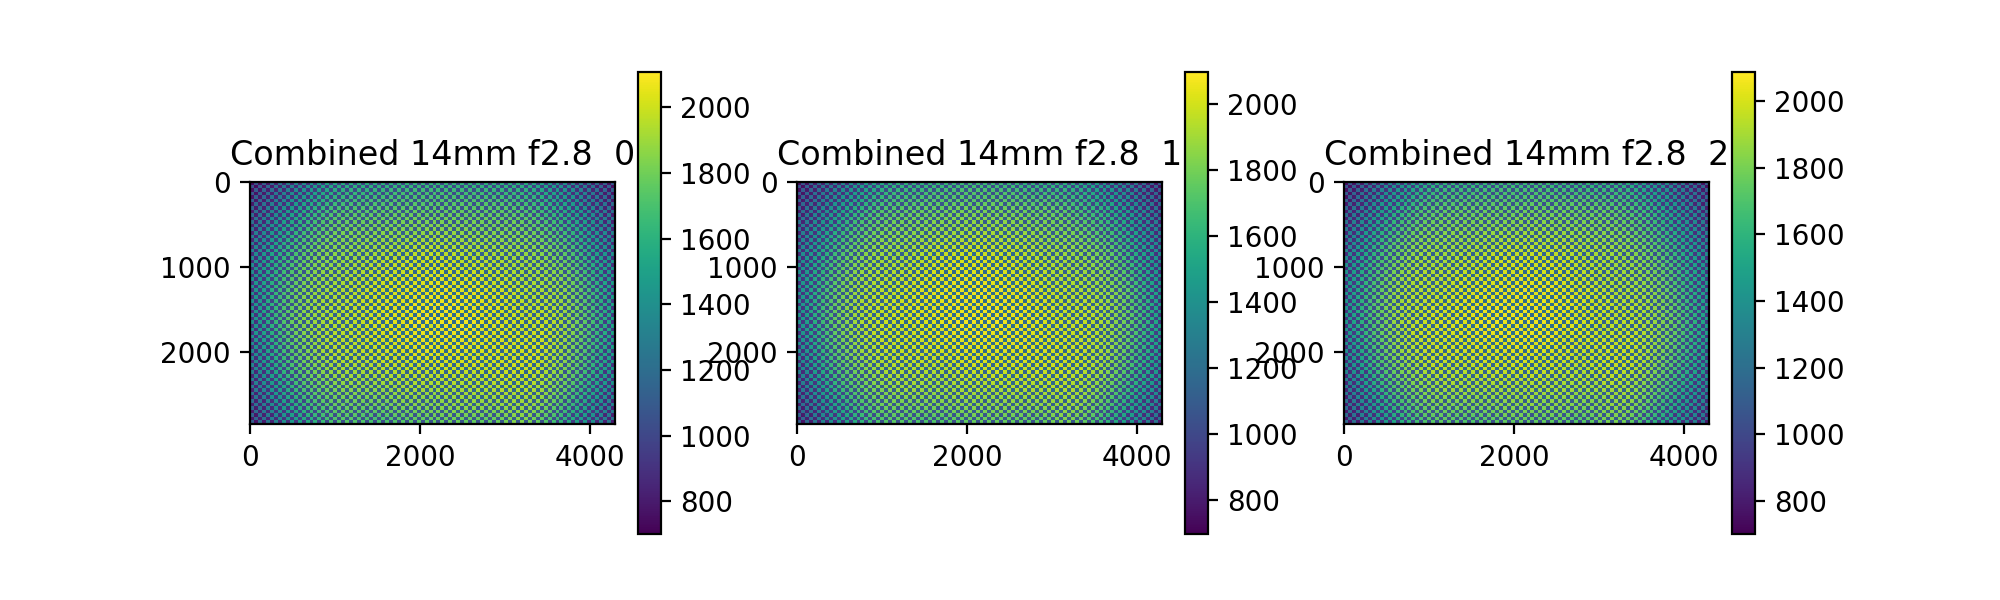

<IPython.core.display.Javascript object>


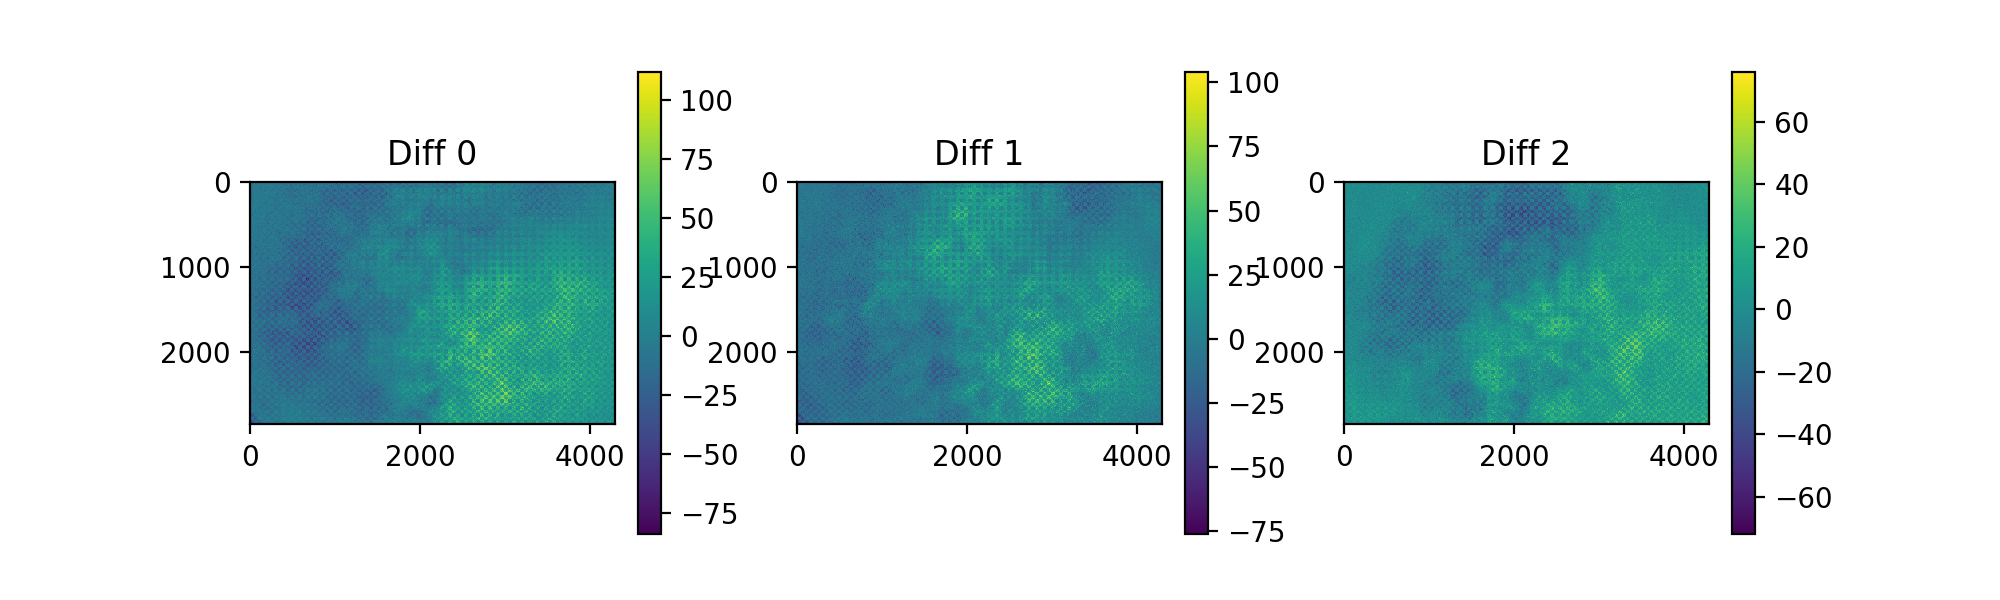

In [6]:
# Flats made indoors. Three sets of 30 flats each. Camera rotated 90 degrees in between sets.
# 14mm f2.8
list_raw = glob.glob(path + 'raw_1/*.ARW')
process(list_raw, slice(0,30), slice(31,60), slice(61,90), '14mm f2.8 ', combination_function=np.median)

<IPython.core.display.Javascript object>


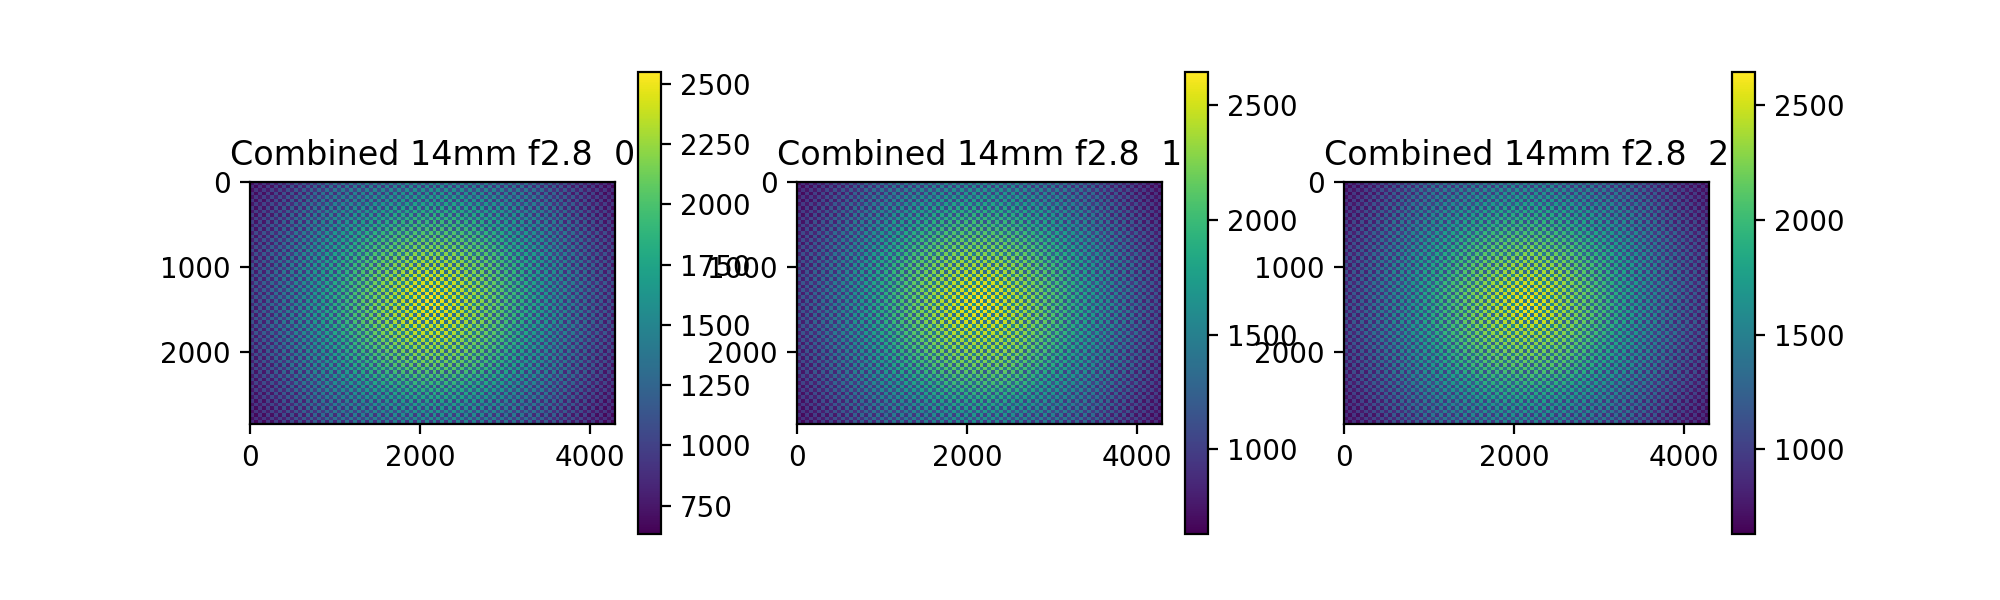

<IPython.core.display.Javascript object>


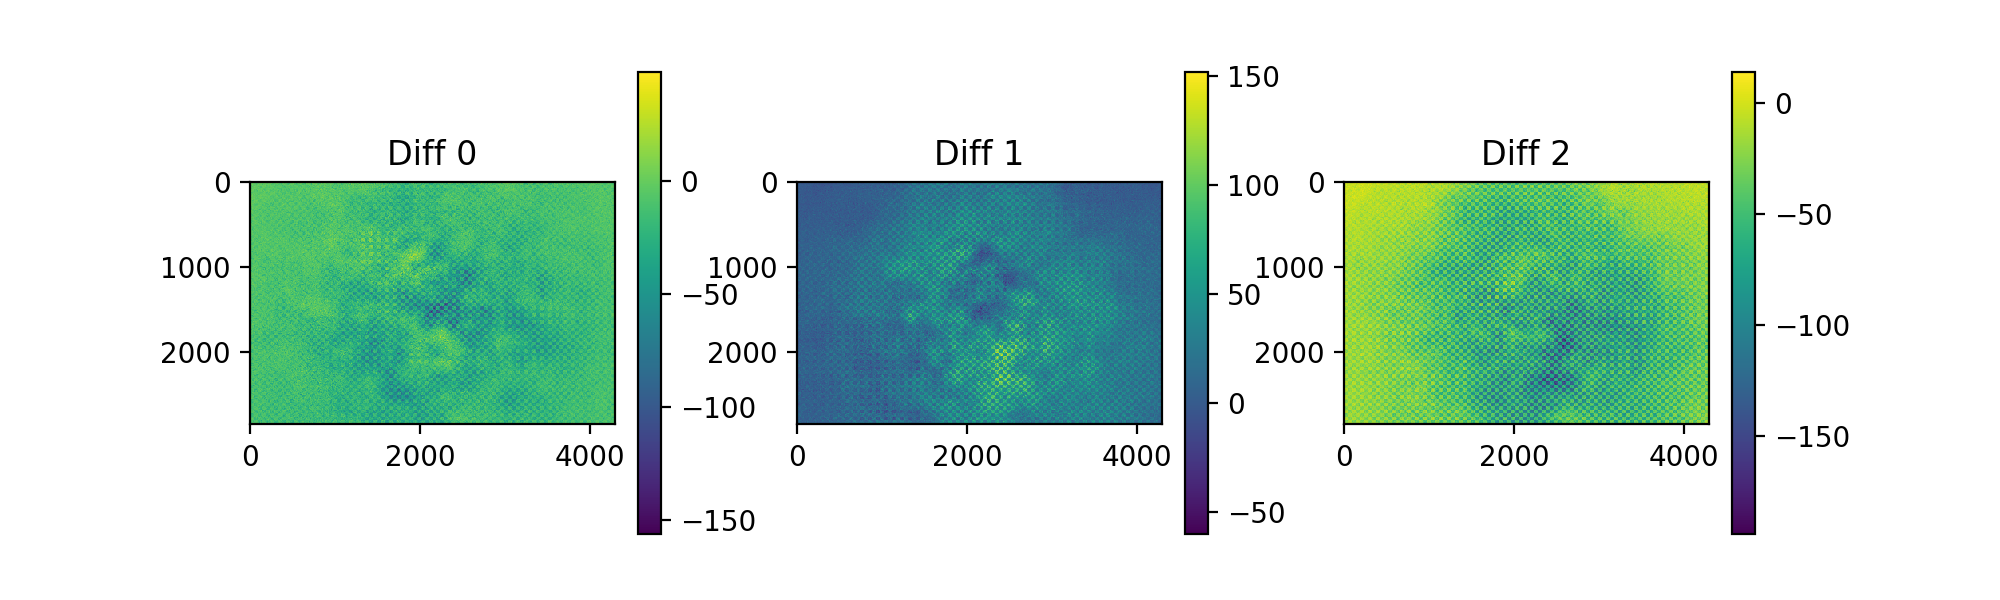

In [7]:
# Flats made outdoors. Three sets of 30 flats each. Camera rotated 90 degrees in between sets.
# 14mm f2.8
list_raw = glob.glob(path + 'raw_2/*.ARW')
process(list_raw, slice(0,30), slice(31,60), slice(61,90), '14mm f2.8 ', combination_function=np.median)

<IPython.core.display.Javascript object>


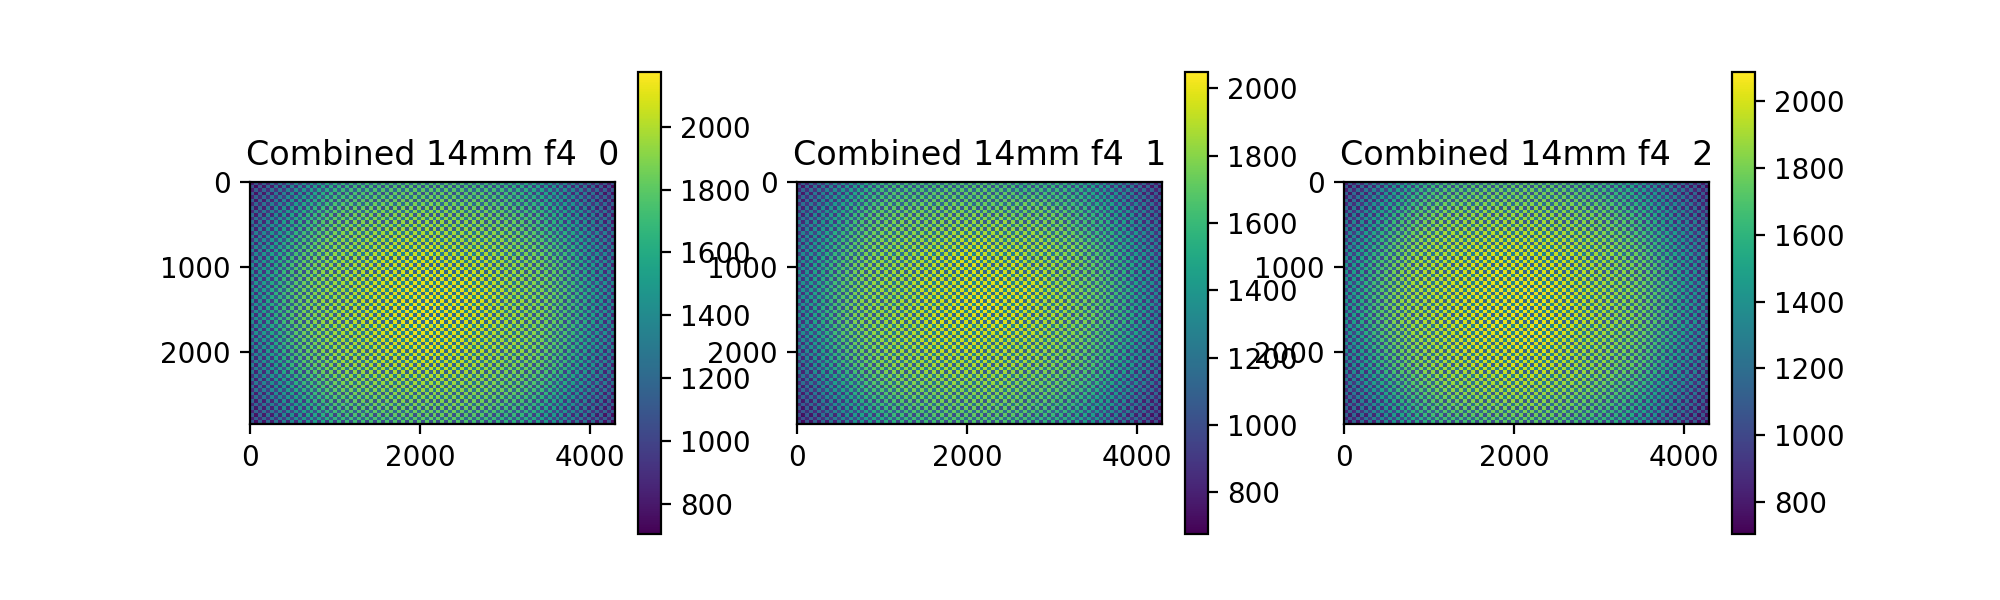

<IPython.core.display.Javascript object>


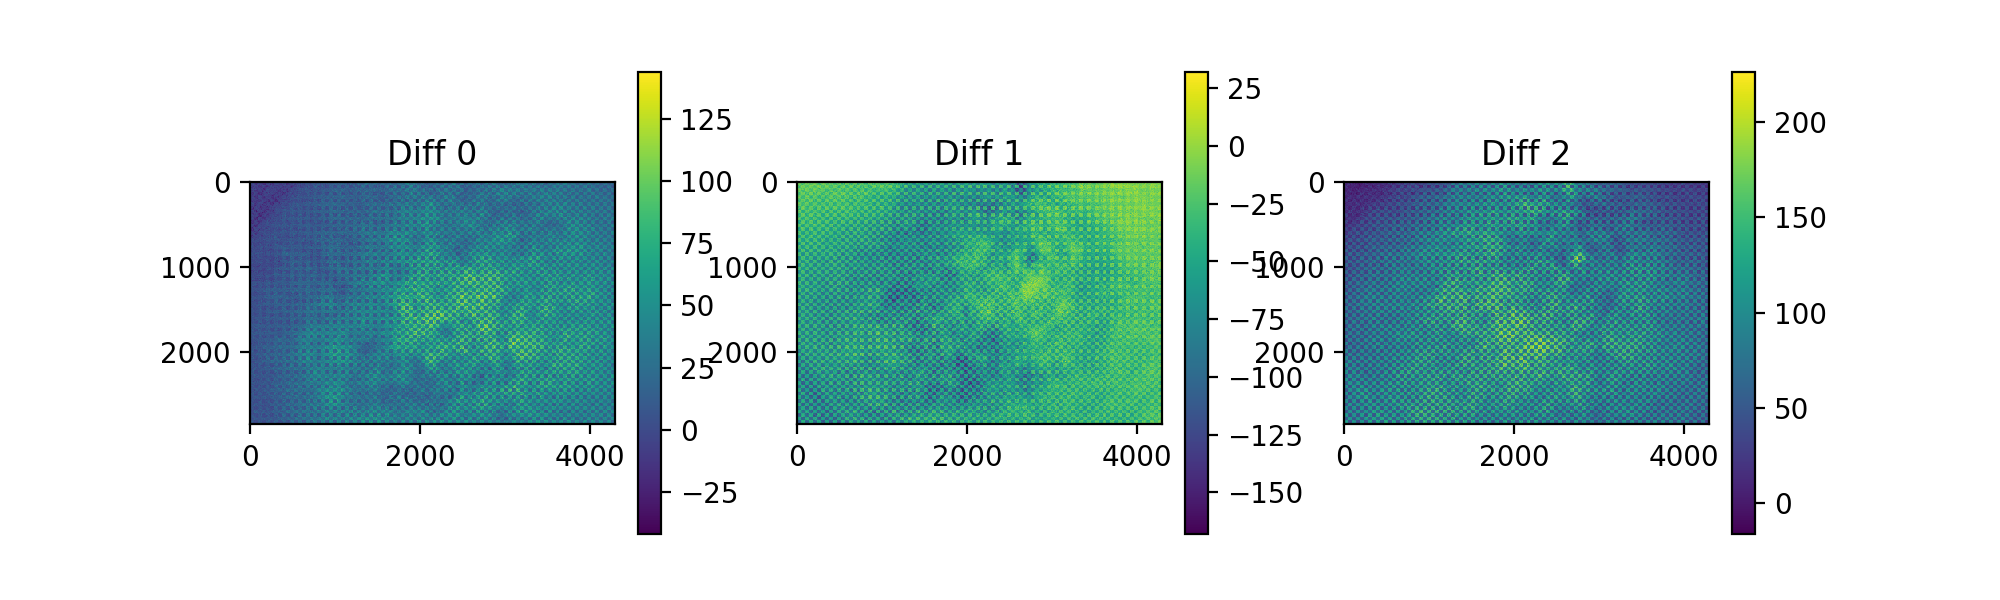

In [8]:
# Flats made outdoors. Three sets of 30 flats each. Camera rotated 90 degrees in between sets.
# 14mm f4
list_raw = glob.glob(path + 'raw_f4/*.ARW')
process(list_raw, slice(0,30), slice(31,60), slice(61,90), '14mm f4 ', combination_function=np.median)